<a href="https://colab.research.google.com/github/ypochoag/ML_Clothing_Classification/blob/main/ML_Clothing_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Aplicado**
##**Modulo 2:** ***introducción a Machine Learning con Python***
### *Presentado por:* 
*   Yuri Ochoa Guerrero - Ingeniera Agricola e Industrial 
*   Eduardo Luna Silva - Ingeniero Mecatronico 
---
|            | ![Fashion-mnist](https://peltarion.com/static/fashion-mnist_long.png)| 
|    ---        |            |

---


Importamos las librerias a usar y demás elementos de utilidad:

In [ ]:
#Importar librerías 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

#Libreria para componentes minimos principales:
from sklearn.decomposition import PCA

#Libreria modelo Gausiano y validación cruzada:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Tratamiento de imagenes:
from PIL import Image
import urllib.request
import PIL.ImageOps 

%matplotlib inline

!python --version
print(f'pandas { pd.__version__}')
print(f'NumPy { np.__version__}')
print(f'Matplotlib { mpl.__version__}')

Python 3.6.9
pandas 1.1.4
NumPy 1.18.5
Matplotlib 3.2.2


#***1 - Entendimiento del negocio***


---




###**A. Objetivos de negocio:**
Como aplicación academia se propone dar solución a un problema de clasificación usando el Dataset Fashion-MNIST, pero, a modo de ilustración se tomará el problema situado bajo el siguiente escenario:
Una empresa de venta de ropa en Colombia abre sus puertas nuevamente, después de haber vivido las consecuencias de la pandemia ocasionada por el Covid-19 en otros países y pensando en la seguridad de las personas, decide automatizar completamente sus tiendas, su ideal, es mantener el contacto entre personal, clientes y prendas en lo más mínimo, así mismo como, reducir el tiempo de permanencia de personas en la tienda, entre todas las ideas que planteadas y las inversiones realizadas en equipos de bodegaje automático e interfaces de interacción, con el ánimo de reducir todo tipo de contacto, una de ellas es la identificación automática de prendas, el personal solo debe encargarse de colgar todos los elementos en ganchos y colocarlos en la entrada del sistema de bodegaje automático, a nosotros nos contrataron para realizar la identificación de la prenda y enviar una etiqueta al sistema para que pueda posicionarla en la sección indicada, de tal manera que cuando alguno de los clientes requiera ver las prendas de una sección, solo se le muestren del tipo que el selecciono; este desarrollo reducirá contacto entre el personal con los clientes, ya que ellos interactuaran con el sistema de bodegaje automático mediante una interfaz, que a su vez reduce el contacto con las prendas, dado que los clientes no tocaran ninguna prenda para realizar labores de búsqueda, todo se realizara mediante visualización automática y solo se entregara al cliente cuando este tome la decisión de llevarla.

Es necesario que el algoritmo funcione con el menor error posible, dado que, de no hacerlo, el personal deberá realizar las correcciones ingresando a la bodega y cambiando la prenda de sección, además que a futuro la empresa desea implementar nuevas prendas como sombreros y accesorios, ellos nos contratarían para realizar el desarrollo, si existe una tasa de éxito elevada.


###**B. Metas del proyecto de machine learning:**
Como se indicó anteriormente, el objetivo principal es obtener un algoritmo de clasificación que nos permita tener el menor error posible, para dar cumplimiento del objetivo se abordara el problema mediante las siguientes metas parciales:

-	Exploración de los datos suministrados por el cliente para lograr una organización óptima para el desarrollo de la aplicación.

-	Prueba de diferentes modelos con el animo de realizar una comparación entre ellos y seleccionar el que tenga una mayor tasa de éxito en su evaluación.

-	Prueba de selección con una muestra externa a los datos base.


#***2 - Entendimiento de los datos***


###**A. Recolección inicial de datos:**

Los datos que usaremos seran tomados del Dataset [**Fashion MINST**](https://www.kaggle.com/zalando-research/fashionmnist) suministrados por una tienda de moda online alemana llamada Zalando, que para nuestro ejemplo de aplicación, es la que abriria su nueva sucursal en Colombia, en este caso tenemos que los datos de entrenamiento y de prueba ya se encuentran separados y en dos archivos distintos, estos archivos se subieron a una carpeta en Dropbox, se intento realizar la aplicación con una carpeta de Drive, pero, al tener que aceptar descarga bajo responsabilidad del usuario por posibles virus, debido a lo pesado del archivo, se tuvo que seleccionar Dropbox; se dejaron publicos y se obtuvo el link de descarga directa, esto para lograr obtener los datos desde el notebook directamente sin necesidad de cargarlos en el proyecto.

In [ ]:
# Llamamos los datos entrenamiento y prueba:
URL_train = 'https://www.dropbox.com/s/wconz2juzb2k93j/fashion-mnist_train.csv?dl=1'
D_train = pd.read_csv(URL_train)

URL_test = 'https://www.dropbox.com/s/n2lsk0w68sx2mha/fashion-mnist_test.csv?dl=1'
D_test = pd.read_csv(URL_test)

###**B. Descripción de los datos:**

Para tener una idea clara de los datos que se nos suministran miramos los 5 primeros items de cada uno de los archivos cargados, esto con la intensión de confirmar que tengan la misma forma, tamaño y variables, para que no se vaya a tener problemas a la hora de probar los algoritmos una vez que ya se encuentren entrenados, así mismo para poder identificar donde se encuentran las etiquetas y la información. 

In [ ]:
print(D_train.head(5))
print(D_test.head(5))

   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      2       0       0       0  ...         0         0         0         0
1      9       0       0       0  ...         0         0         0         0
2      6       0       0       0  ...         0         0         0         0
3      0       0       0       0  ...         0         0         0         0
4      3       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]
   label  pixel1  pixel2  pixel3  ...  pixel781  pixel782  pixel783  pixel784
0      0       0       0       0  ...         0         0         0         0
1      1       0       0       0  ...         0         0         0         0
2      2       0       0       0  ...        31         0         0         0
3      2       0       0       0  ...       222        56         0         0
4      3       0       0       0  ...         0         0         0         0

[5 rows x 785 columns]


Tal como se indicaba en los textos que describen el dataset, la información esta organizada de tal manera que en la primera columna se encuentra la información de las etiquetas:
```
# Descripción de Labels:

0 - Camiseta / top
1 - Pantalón
2 - Suéter
3 - Vestido
4 - Abrigo
5 - Sandalia
6 - Camiseta
7 - Zapatilla
8 - Bolsa
9 - Bota de tobillo

```

Seguido la información de cada uno de los pixeles que describen la fotografia correspondiente a la etiqueta, son en total 784 (28X28) cada pixel tiene un valor entero entre 0 y 255 siendo representados en escala de grises 0 blanco y 255 negro, si se requiere obtener algun valor de la fotografia en coordenadas de filas(i) y columnas(j) se puede hacer uso de la siguiente ecuación  Pix = i * 28 + j, a continuación veremos cuantos datos tenemos para relizar el entrenamiento y las pruebas de nuestros algoritmos.

In [ ]:
print("Datos para entrenar nuestro modelo:", D_train.index.size)
print("Datos para probar nuestro modelo:",D_test.index.size)
print("Total de datos:", ( D_train.index.size + D_test.index.size))


Datos para entrenar nuestro modelo: 60000
Datos para probar nuestro modelo: 10000
Total de datos: 70000


Esto quiere decir que tenemos un **14,28 %** de los datos para realizar las prueba y un  **85,72 %** para entrenar a nuestro modelo, dado que las proporciones estan en buen medida se dejaran asi y se comprobara que se encuentren bien distribuidas con respecto a las etiquetas. 

###**C. Exploración de los datos:**

Para poder definir si se puede trabajar con la distribución que se plantea de los datos de entrenamiento y de prueba, primero es necesario encontrar la proporción de muestras por etiqueta en cada uno de los archivos, ya que si no se encuentran distribuidas de manera homogenea lo mejor es unir los dos archivos y volver a realizar la separación con la función **train_test_split** teniendo en cuenta las etiquetas.

In [ ]:
print("Cantidad de fotos de cada clase para entrenar:\n", D_train['label'].value_counts())
print("\nCantidad de fotos de cada clase para probar:\n",D_test['label'].value_counts())

Cantidad de fotos de cada clase para entrenar:
 9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

Cantidad de fotos de cada clase para probar:
 7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
Name: label, dtype: int64


Como se puede observar todos los datos se encuentran perfectamente balanceados, asi que los usaremos para realizar el entrenamiento y la prueba tal como nos lo entrega el Dataset, no vemos necesidad de realizar una distribución adicional.

Ahora, sabiendo que cada uno de los datos en realidad es una imagen, es necesario crear herramientas para visualizarlos de una forma gráfica, por esto se crea la siguiente función:

In [ ]:
def show_picture(image, title=''):
  plt.figure(dpi = 50)
  plt.imshow(image.reshape(28,28), cmap = 'gray')
  plt.axis('off')
  plt.title(title)
  plt.show()

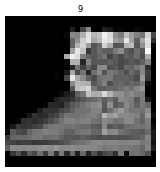

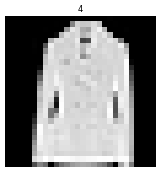

In [ ]:
# Se separan las etiquetas del conjunto de datos:
Label_Train = np.array(D_train['label'])
Label_Test = np.array(D_test['label'])

# Se retiran las etiquetas para obtener la Data:
Data_Train = np.array(D_train.drop('label', axis=1))
Data_Test = np.array(D_test.drop('label', axis=1))

# Probamos la función creada:
show_picture(Data_Train[12], Label_Train[12])
show_picture(Data_Test[12], Label_Test[12])

Como se puede evidenciar, los datos fueron graficados con exito gracias al metodo de visualización de **Matplotlib - imshow** y se distingue el tipo de prenda al cual hacen referencia. 

###**D. Verificación de la calidad de los datos:**  

Para lograr esta etapa, se visualizara el contenido de los primeros 20 datos de cada uno de los conjuntos de datos que tenemos, tal como se muestra a continuación.

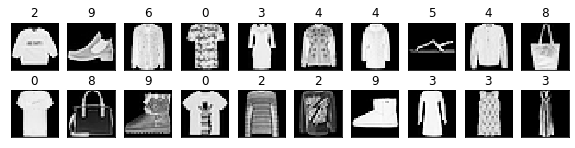

In [ ]:
# Graficación de datos de entrenamiento:
fig = plt.figure(figsize=(10,6))
for i in range(20):
    ax = fig.add_subplot(5,10,i+1)
    plt.imshow(Data_Train[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(Label_Train[i]))
    plt.xticks([]); plt.yticks([])

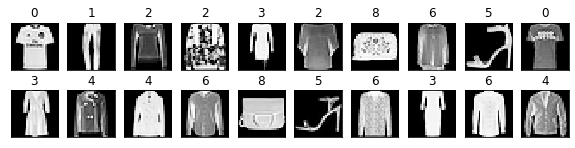

In [ ]:
# Graficación de datos de prueba:
fig = plt.figure(figsize=(10,6))
for i in range(20):
    ax = fig.add_subplot(5,10,i+1)
    plt.imshow(Data_Test[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    ax.set_title(int(Label_Test[i]))
    plt.xticks([]); plt.yticks([])

Una vez confirmado que los datos dentro de los dos archivos tienen efetivamente las fotografias de las prendas y al haber graficado diferentes posiciones de los conjuntos de datos, es posible continuar con la preparación de los mismos para poder entrenar nuestro modelo.

#***3 - Preparacion de los Datos***

---


###**A. Selección de datos finales:**  

Se nombran de manera adecuada los datos que ya fueron tratados en la estapa anterior, de tal manera que sean familiares para entrenarlos y evaluarlos tal y como se han manejado en el curso, es decir, los conjuntos de datos (X,Y). 

In [ ]:
# Conjunto de entrenamiento:
X_train = Data_Train
y_train = Label_Train

# Conjunto de prueba:
X_test = Data_Test
y_test = Label_Test

###**B. Limpieza de los datos:**  

Debido a que el conjunto de datos es un Dataset bastante conocido, usado en aprendizaje de maquina y se confirmó que se encuentra en conduciones optimas para ser trabajado, no existe necesidad de realizar tareas de limpieza de datos.  

#***4 - Modelamiento***

---

###**A. Selección de modelo apropiado:**  

Teniendo en cuenta que la identificación de las imagenes corresponde a un problema de **clasificación** y es necesario el uso de una data historica para el entrenamiento del módelo (en este caso fotografias de diferentes prendas de ropa) el módelo a usar es uno de **aprendizaje supervisado**.

Como se trabaja con imagenes y estas son datos de alta dimensionalidad, es apropiado reducir las características necesarias para representar un mínimo de información, por lo tanto, se usará el algoritmo de **componentes principales minimos**, se probara el modelo con la cantidad de componentes necesarios para obtener las siguientes varianzas:

- Varianza 0.5.
- Varianza 0.75.
- Varianza 0.95.



Para lograr visualizar de manera facil y mediante una gáfica la cantidad de componentes a usar para llegar a una varianza objetivo se implementa la siguiente función:

In [ ]:
# Gráfica de la varianza explicada acumulada.
def cumulative_explained_variance_plot(expl_variance):
  cum_var_exp = np.cumsum(expl_variance)
  plt.figure(dpi = 70, figsize = (15, 6))
  plt.title('Curva acumulativa de la varianza explicada versus número de componentes principales')
  plt.xlabel('Número de componentes principales')
  plt.ylabel('Varianza explicada acumulativa')  
  nc = np.arange(1, expl_variance.shape[0] + 1)
  plt.plot(nc, cum_var_exp, '--r')
  plt.plot(nc, cum_var_exp, 'c*', ms = 5) 
  plt.grid() 
  plt.show()

Para obtener el valor exacto de los componentes que se deben usar, se implementa la siguiente función:

In [ ]:
def componentes_minimos(min_varz, X):
  pca = PCA(n_components=None)
  pca.fit_transform(X)
  var_cum = np.cumsum(pca.explained_variance_ratio_)
  var_sel = var_cum[var_cum >= min_varz][1]
  min_comp = list(var_cum).index(var_sel)
  print(f'Se necesita por lo menos {min_comp} componentes para una varianza explicada de {min_varz}.')


Se entrenaran los modelos PCA con el numero de componentes minimos seleccionados con la ayuda de la función definida anteriormente, se transformaran los datos originales para intentar obtener un mejor rendimiento del modelo, se visualizaran los datos mediante la transformada inversa de los mismos, para confirmar que tanta información se perdio, para ello se hace uso de la siguiente función.



In [ ]:
def pca_transform(X, n_comp, n_item):
  pca = PCA(n_components=n_comp)
  Xp = pca.fit_transform(X)
  Xr = pca.inverse_transform(Xp[n_item])
  if n_item > 0:
    show_picture(X[n_item], "Original")
    show_picture(Xr.reshape(28,28), "Transformada")
    
  return Xp

Por ultimo se implementara un clasificador bayesiano con el método **sklearn.naive_bayes.GaussianNB** y se evaluara con los datos originales y los obtenidos de las transformación PCA para los tres casos planteados anteriormente.

###**B. Diseño de la experimentación:**  

Tal como se indico en la sección anterior, se pretente entrenar varios modelos usando un clasificador bayesiano, pero, con datos a los cuales se les realizara una reducción de dimensionalidad con ayuda del algoritmo PCA, se tomaran tres casos con diferentes cantidad de componenetes principales y se realizara la correspondiente validación cruzada para cada uno de ellos, buscando cual de todos realiza una mejor clasificación.

A continuación se calcularan los componentes minimos para las varianzas propuestas:

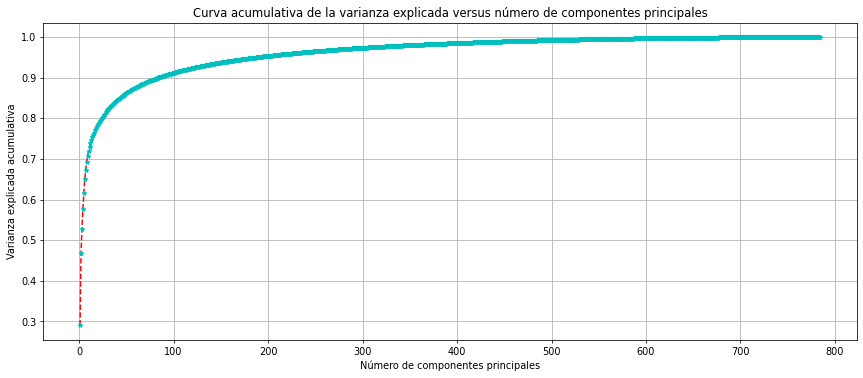

Se necesita por lo menos 3 componentes para una varianza explicada de 0.5.
Se necesita por lo menos 14 componentes para una varianza explicada de 0.75.
Se necesita por lo menos 187 componentes para una varianza explicada de 0.95.


In [ ]:
pca = PCA()
transf = pca.fit_transform(X_train)
varianza_expl = pca.explained_variance_ratio_
cumulative_explained_variance_plot(varianza_expl)
#Caso 1:
componentes_minimos(0.5, X_train)
#Caso 2:
componentes_minimos(0.75, X_train)
#Caso 3:
componentes_minimos(0.95, X_train)


###**C. Construcción y entrenamiento de los modelos:**  

Se realiza la reducción de dimensión de componentes para los datos de entrenamiento y se valida cuanta información se pierde de acuerdo al numero de componentes usado, con su transformada inversa:

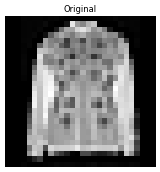

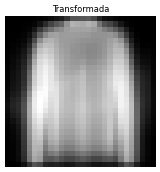

In [ ]:
X_PCA_3 = pca_transform(X_train, 3, 5)

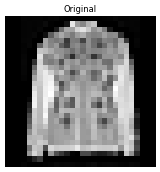

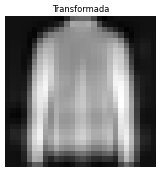

In [ ]:
X_PCA_14 = pca_transform(X_train, 14, 5)

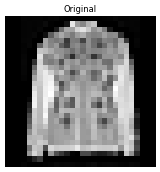

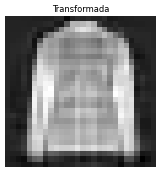

In [ ]:
X_PCA_187 = pca_transform(X_train, 187, 5)

Como se puede evidenciar, a medida que se utilizan más componentes se pueden visualizar mayores detalles de la imagen original, teniendo la ventaja que al utilizar PCA se deja de utilizar información que no es relevante para el algoritmo que se piensa desarrollar, ademas que se ahorra tiempo de ejecución.


Se hayan los modelados usando los datos de entrenamiento del original y los 3 transformados mediante PCA:

In [ ]:
print("Accuracy con datos originales:", "{:.2f}".format(np.mean(cross_val_score(GaussianNB(), X_train, y_train, cv=5))))
print("Accuracy con la representación 3 componentes:", "{:.2f}".format(np.mean(cross_val_score(GaussianNB(), X_PCA_3, y_train, cv=5))))
print("Accuracy con la representación 14 componentes:", "{:.2f}".format(np.mean(cross_val_score(GaussianNB(), X_PCA_14, y_train, cv=5))))
print("Accuracy con la representación 187 componentes:", "{:.2f}".format(np.mean(cross_val_score(GaussianNB(), X_PCA_187, y_train, cv=5))))

Accuracy con datos originales: 0.59
Accuracy con la representación 3 componentes: 0.57
Accuracy con la representación 14 componentes: 0.72
Accuracy con la representación 187 componentes: 0.75


#***5 - Evaluación.***  

###**A. Definición de los criterios o métricas de evaluación:**  

Por ultimo se realizó el proceso de modelado de clasificación de las imágenes, y comparemos los resultados de los diferentes modelos con los datos de prueba. En este caso usaremos un clasificador bayesiano con el método sklearn.naive_bayes.GaussianNB

In [ ]:
import 
print("Accuracy con datos originales:", "{:.2f}".format(np.mean(cross_val_score(GaussianNB(), X_test, y_test, cv=5))))
print("Accuracy con la representación 3 componentes:", "{:.2f}".format(np.mean(cross_val_score(svc(), pca_transform(X_test, 3, -1), y_test, cv=5))))
print("Accuracy con la representación 14 componentes:", "{:.2f}".format(np.mean(cross_val_score(svc(), pca_transform(X_test, 14, -1), y_test, cv=5))))
print("Accuracy con la representación 187 componentes:", "{:.2f}".format(np.mean(cross_val_score(svc(), pca_transform(X_test, 187, -1), y_test, cv=5))))

Accuracy con datos originales: 0.57
Accuracy con la representación 3 componentes: 0.57
Accuracy con la representación 14 componentes: 0.72
Accuracy con la representación 187 componentes: 0.73


Para cumplir el objetivo final, se cargaron a la plataforma Dropbox 10 imagenes de ropa correspondientes a 10 items distintos según la tabla inicial con la información de las etiquetas, se les realizara un procesamiento de imagen para tranformarlas a escala de grises y aplicar un escalamiento a formato 28X28 pixeles:

In [ ]:
#Se define un arreglo con fuentes de varias imagenes:
URL = ("https://www.dropbox.com/s/ikh0cxb2gyq1p1o/01.jpeg?dl=1",
       "https://www.dropbox.com/s/69zjbry1izpxbdw/02.jpeg?dl=1",
       "https://www.dropbox.com/s/bcpj6efewvejaxx/03.jpeg?dl=1",
       "https://www.dropbox.com/s/a3rya9qks7v5rrj/04.jpeg?dl=1",
       "https://www.dropbox.com/s/ffoon94q6fh1328/05.jpeg?dl=1",
       "https://www.dropbox.com/s/vt8oblaxfk0p3nc/06.jpeg?dl=1",
       "https://www.dropbox.com/s/73gt9a7tq70mkht/07.jpeg?dl=1",
       "https://www.dropbox.com/s/z6cvu3tu63huq4z/08.jpeg?dl=1",
       "https://www.dropbox.com/s/c0k0z152in03djv/09.jpeg?dl=1",
       "https://www.dropbox.com/s/9kehpio4chrnk1w/10.jpeg?dl=1",
       "https://www.dropbox.com/s/1o7v07w03xlek99/11.jpeg?dl=1",
       "https://www.dropbox.com/s/534fjuqa541rxdd/12.jpeg?dl=1",
       "https://www.dropbox.com/s/50qj5ih2yypk9h8/13.jpeg?dl=1",
       "https://www.dropbox.com/s/kjvqkxyeno53jee/14.jpeg?dl=1")

Test_Img = X_test[0:14]
a = 1
for a in range(14):
  with urllib.request.urlopen(URL[a]) as url:
      with open('temp.jpg', 'wb') as f:
          f.write(url.read())
  img = Image.open('temp.jpg').convert('LA').resize((28,28))
  pix = img.load()
  x = 0
  for i in range(28):
    for j in range(28):
      Test_Img[a][x] = 255 - pix[j,i][0]
      x = x + 1

In [ ]:
#Se confirma que el tamaño del arreglo: 
Test_Img.shape

(14, 784)

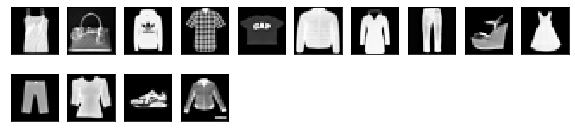

In [ ]:
# Graficación de datos:
fig = plt.figure(figsize=(10,6))
i = 0
for i in range(14):
    ax = fig.add_subplot(5,10,i+1)
    plt.imshow(Test_Img[i].reshape(28,28), interpolation="nearest", cmap = plt.cm.Greys_r)
    plt.xticks([]); plt.yticks([])

Una vez ajustadas las imagenes, se procede a probar nuestros modelos con ellas:

In [ ]:
y_predict_img = model_Ori.predict(Test_Img)
y_predict_img

array([3, 6, 4, 3, 6, 8, 3, 6, 5, 3, 1, 2, 7, 4])

In [ ]:
y_predict_img_3 = model_3.predict(pca_transform(Test_Img, 3, -1))
y_predict_img_3

array([0, 8, 0, 6, 5, 4, 3, 6, 5, 1, 7, 8, 7, 8])

In [ ]:
y_predict_img_14 = model_14.predict(pca_transform(Test_Img, 14, -1))
y_predict_img_14

array([0, 5, 4, 2, 5, 6, 3, 6, 6, 0, 5, 8, 5, 8])

###**B. Análisis de los resultados:** 

Como se observo en la etapa de evaluación de los modelos, al utilizar los datos de entrenamiento reducidos se obtiene una mayor precisión que al usar los datos originales, aunque en la primera prueba con el modelo donde se tomo 3 componentes el porcentaje de precisión con los datos reducidos y los datos originales no estuvieron tan alejados al utilizar 14 y187 componentes correspondientes a  mas del 75% de varianza si se obtuvo una mejoría en la precisión a la hora de clasificar.


Como se puede evidenciar con las fotografías finales de prueba, no se tiene un buen resultado, pese a que se esperaba lo contrario, esto seguramente se debe a que estas imágenes sufrieron por un arreglo anterior realizado por nosotros y que no cumplía unas pautas y procedimientos para la toma y recolección de los datos definidos por nuestro cliente, estas pautas pueden ser distancias de las prendas, luz a la hora de tomar la fotografía e incluso acomodación de la prenda o del ángulo de toma.
En conclusión, se deben realizar nuevos algoritmos de clasificación con el animo de cumplir con la expectativa de nuestro cliente.
